## Test

In this file we will test our model on 5 city of increasing size (which graphs and other stuff are already generated) and then plot execution times and maybe other things.

`N` and `d` can be randomly generated, or maybe not.

Using `launch.py` we can launch our solver with:
- `N` randomly generated order
- `d` deliverers
- on a city `c`
- with timeout `t`

These ideas can be used to create a single program that execute for *x* times the solver for each city , using `N` and `d` generated from a selected probability distribution.

In [43]:
import pandas as pd
import seaborn as sb
import os
import numpy as np
from IPython.display import clear_output

In [197]:
names = ["Visano", "Asola","Montichiari","Brescia","Roma"]

**NB** Time is measured in second (by launch.py)

In [ ]:
x = 10; # not unsat times for each city
times = pd.DataFrame(columns=['city','time','time_type','unsat','N','d'])
#times = pd.read_csv('results-increasing-size.csv')  
#names = ["Roma"]

N = 10
d = 2
timeout = 300

for n in names:

    unsats = 0
    c = 0

    while (c < x):

        cmd = 'python3 launch.py -N ' + str(N) + ' -d ' + str(d) + ' -c ' + str(n) + ' -t ' + str(timeout) 
        print(cmd)
        out = os.popen(cmd).read()
        unsat = ('UNSAT' in out)

        unsats += unsat
        c += not unsat

        line = [line for line in out.split('\n') if "%%%mzn-stat: solveTime" in line]
        line2 = [line for line in out.split('\n') if "%%%mzn-stat: initTime" in line]
        if line != []:
            time = float(line[0].split('=')[1])
        else:
            time = timeout
            
        if line != []:
            inittime = float(line2[0].split('=')[1])
        else:
            inittime = timeout

        # Add line to dataframe
        row = {'city': n, 'time': time,'time_type': 'solve', 'unsat': unsat,'N': N, 'd': d}
        row2 = {'city': n, 'time': inittime,'time_type': 'init', 'unsat': unsat,'N': N, 'd': d}
        times = times.append(row, ignore_index = True)
        times = times.append(row2, ignore_index = True)


    # update dataframe csv
    times.to_csv('results-increasing-size.csv', index=False)
    print(n + ': ' + str(unsats) + '/' + str(unsats+x) + ' are unsat.')


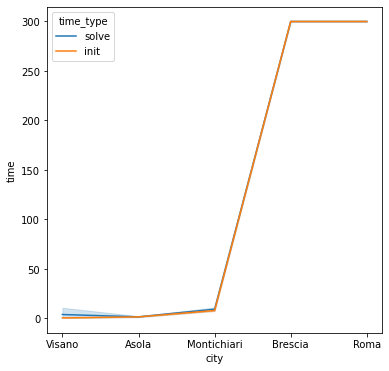

In [213]:
times = pd.read_csv('results-increasing-size.csv')  
#print(times)

times

#times = times.replace(600, 300)
sb.lineplot(data=times, x="city", y="time",hue="time_type")
plt.rcParams["figure.figsize"] = (6,6)

#plot = sb.barplot(data=times, x="city", y="time", hue="unsat")
#plot.set_title('N = 10, d = 3, timeout = 5 minutes')
#plot.set_ylabel('time (seconds)')
#fig = plot.get_figure()
#fig.savefig("out.png") 

In [210]:
times = times[times['city']
sb.lineplot(data=times, x="city", y="time",hue="time_type")
plt.rcParams["figure.figsize"] = (6,6)

SyntaxError: invalid syntax (1779417217.py, line 2)

In [8]:
N = 10
d = 3
n = 'Montichiari'

out = 'UNSAT'
while('UNSAT' in out):

    cmd = 'python3 launch.py -N ' + str(N) + ' -d ' + str(d) + ' -c ' + str(n) + ' -t 300' 
    print(cmd)
    out = os.popen(cmd).read()
    
    if('UNSAT' not in out): print(out.split("TIME: ")[1].split('\n')[0])


python3 launch.py -N 10 -d 3 -c Montichiari -t 300
151.79566349500237


# Increasing the complexity of the problem

In [169]:
cols = ["city", "N", "d", "unsat", "initTime", "solveTime", "solutions", "variables", "propagators", "propagations", "nodes", "failures", "restarts", "peakDepth"]

In [170]:
df = pd.DataFrame(columns=cols);

In [171]:
# loop on N from 2 to 14
# loop on d from 1 to 3

c = "Visano"
X = 3 # repetition for each test

for N in range(2,16):
    for d in range(1,5):
        for x in range(X):
            
            perc = (N-2)*9 + (d-1)*3 + x+1
            perc /= 14*3*3
            perc *= 100
            perc = int(perc)
            clear_output(wait=False)     
            print("Progress: " + str(perc) + "%  ", end='\r')
        
            cmd = 'python3 launch.py -N ' + str(N) + ' -d ' + str(d) + ' -c ' + str(c) + ' -t 120' 
            out = os.popen(cmd).read()
            
            temp = [line for line in out.split("\n") if "%%%mzn-stat: " in line]
            
            stats = {}
            for k in range(4, len(cols)):
                if [float(line.split("=")[1]) for line in temp if "%%%mzn-stat: " + cols[k] in line] != []:
                    stats[cols[k]] = [float(line.split("=")[1]) for line in temp if "%%%mzn-stat: " + cols[k] in line][0]
                else:
                    stats[cols[k]] = np.NaN
                
            row = {"city": c, "N": N, "d": d, 'unsat': 'UNSAT' in out}
            row.update(stats)
            print(row)
            
            df = df.append(row, ignore_index = True)



Traceback (most recent call last):
  File "launch.py", line 182, in <module>
    solve_time = float(solver_time_l[0].split('=')[1])
IndexError: list index out of range


{'city': 'Visano', 'N': 15, 'd': 4, 'unsat': False, 'initTime': nan, 'solveTime': nan, 'solutions': nan, 'variables': nan, 'propagators': nan, 'propagations': nan, 'nodes': nan, 'failures': nan, 'restarts': nan, 'peakDepth': nan}


In [174]:
df.to_csv('result-increase-problem-2.csv',index=False)

In [175]:
#dfc = df.copy()
dfc = pd.read_csv('result-increase-problem-2.csv', sep = ',', decimal = '.', index_col=False)
dfc.shape
dfc.head()

,city,N,d,unsat,initTime,solveTime,solutions,variables,propagators,propagations,nodes,failures,restarts,peakDepth
0,Visano,2,1,False,0.020939,0.008281,1.0,390.0,150.0,1141.0,8.0,3.0,0.0,5.0
1,Visano,2,1,False,0.025873,0.009064,1.0,437.0,264.0,1794.0,10.0,4.0,0.0,6.0
2,Visano,2,1,False,0.020530,0.007324,1.0,390.0,151.0,1138.0,8.0,3.0,0.0,5.0
3,Visano,2,2,False,0.047029,0.018260,1.0,869.0,522.0,3867.0,19.0,6.0,0.0,14.0
4,Visano,2,2,False,0.037640,0.011643,1.0,775.0,375.0,1434.0,15.0,3.0,0.0,12.0


In [176]:
# Remove NaN
dfc = dfc.dropna()
dfc.shape

(144, 14)

In [177]:
#dfc['compl'] = dfc['N']*dfc['d']
dfc.head()

,city,N,d,unsat,initTime,solveTime,solutions,variables,propagators,propagations,nodes,failures,restarts,peakDepth
0,Visano,2,1,False,0.020939,0.008281,1.0,390.0,150.0,1141.0,8.0,3.0,0.0,5.0
1,Visano,2,1,False,0.025873,0.009064,1.0,437.0,264.0,1794.0,10.0,4.0,0.0,6.0
2,Visano,2,1,False,0.020530,0.007324,1.0,390.0,151.0,1138.0,8.0,3.0,0.0,5.0
3,Visano,2,2,False,0.047029,0.018260,1.0,869.0,522.0,3867.0,19.0,6.0,0.0,14.0
4,Visano,2,2,False,0.037640,0.011643,1.0,775.0,375.0,1434.0,15.0,3.0,0.0,12.0


In [178]:
#dfcc = pd.DataFrame()
#dfcc = dfc[['solveTime','N','d','solutions']]
#dfcc.shape


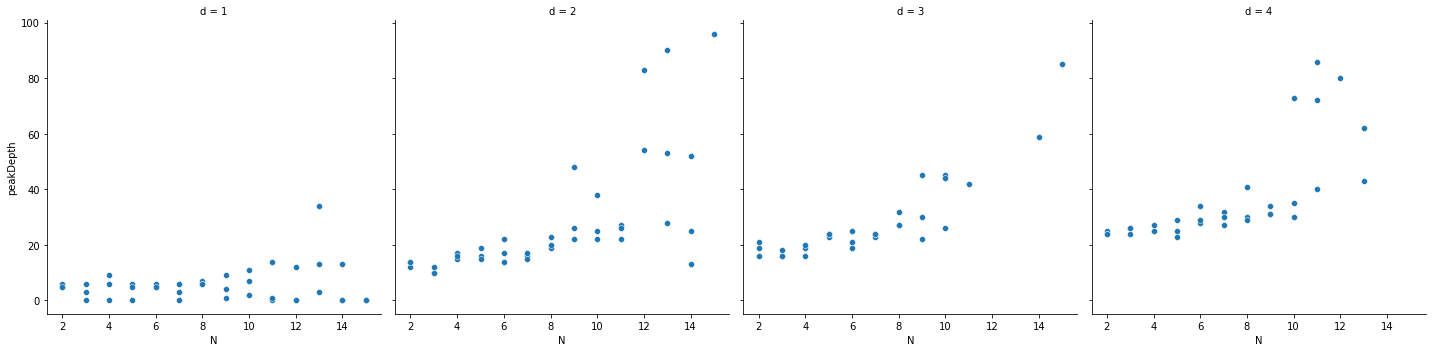

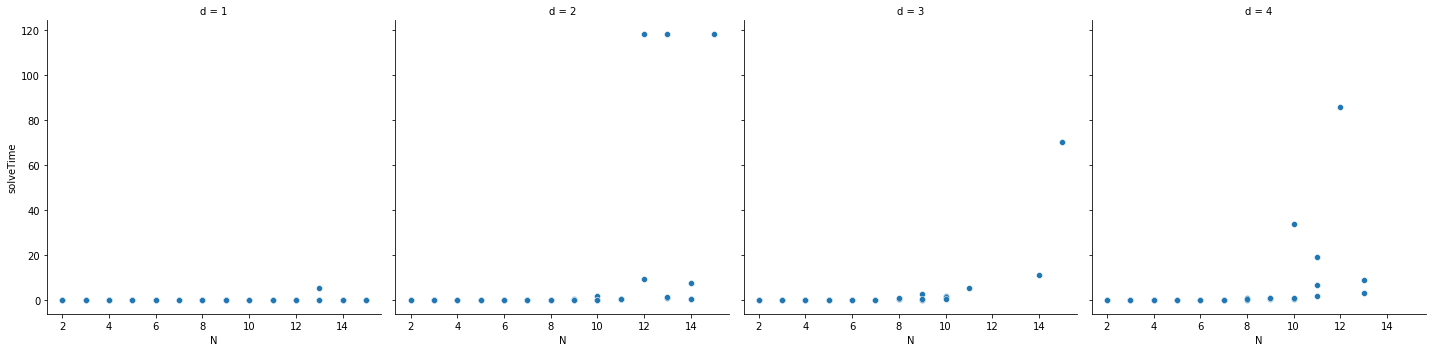

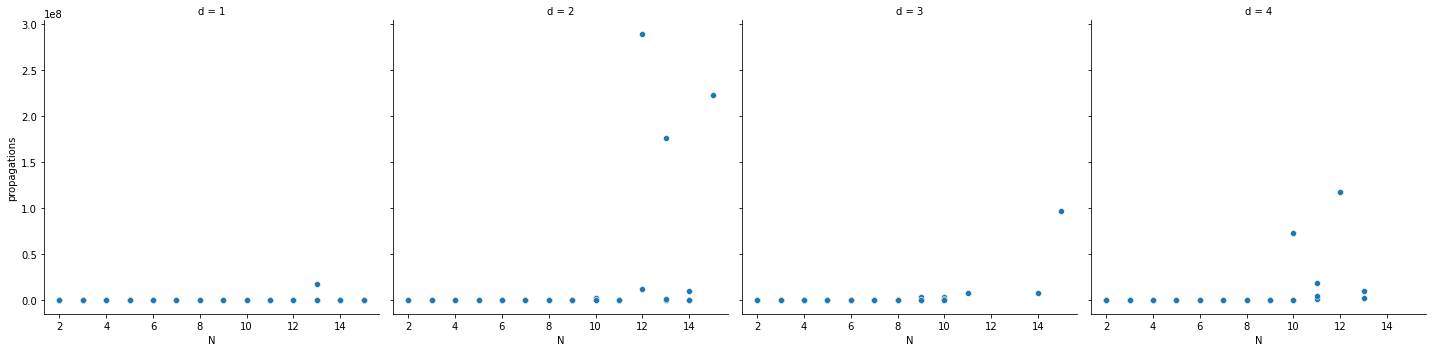

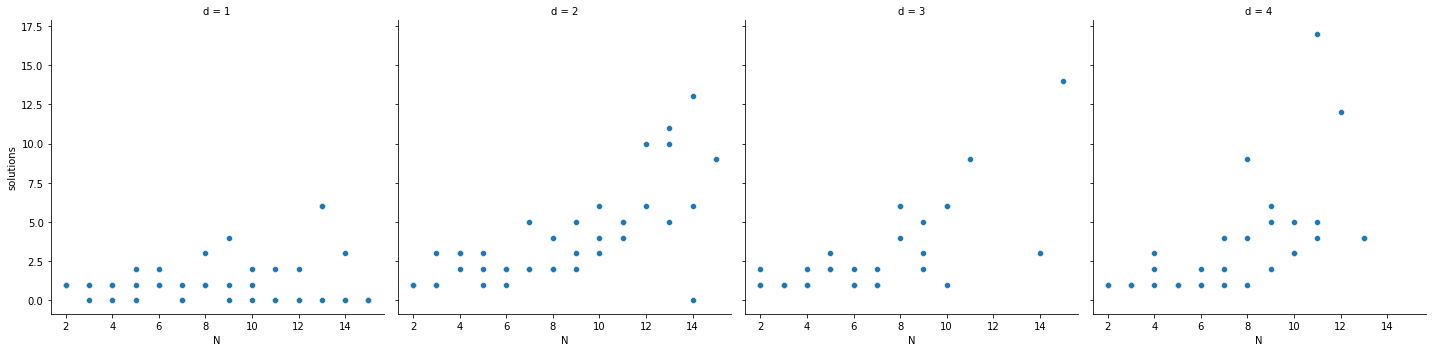

In [179]:
sb.relplot(data=dfc,x='N',y='peakDepth',col='d',kind='scatter')
sb.relplot(data=dfc,x='N',y='solveTime',col='d',kind='scatter')
sb.relplot(data=dfc,x='N',y='propagations',col='d',kind='scatter')
sb.relplot(data=dfc,x='N',y='solutions',col='d',kind='scatter')


ValueError: Index contains duplicate entries, cannot reshape

/tmp/ipykernel_14772/2232806924.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


TypeError: plot() missing 2 required positional arguments: 'xs' and 'ys'

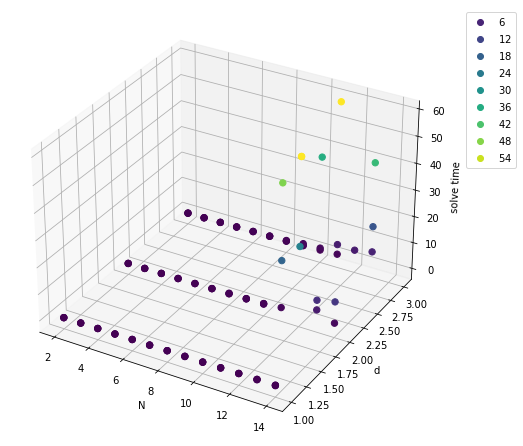

In [107]:
#sb.pairplot(dfcc, hue='d')


from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
x = dfc['N']
y = dfc['d']
z = dfc['solveTime']

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=z, marker='o', alpha=1) #cmap=cmap
ax.set_xlabel('N')
ax.set_ylabel('d')
ax.set_zlabel('solve time')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.plot()
# save
#plt.savefig("scatter_hue", bbox_inches='tight')


# --------

In [26]:
N = 10
d = 2
n = 'Montichiari'

times = []

for i in range(10):
    print(i)
    #out = "%%%mzn-stat: solveTime="
    #while("%%%mzn-stat: solveTime=" in out):

    cmd = 'python3 launch.py -N ' + str(N) + ' -d ' + str(d) + ' -c ' + str(n) + ' -t 60' 
    print(cmd)
    out = os.popen(cmd).read()

    if("%%%mzn-stat: solveTime=" in out): 

        temp = [line for line in out.split("\n") if "%%%mzn-stat: solveTime=" in line]
        times.append(float(temp[0].split('=')[1]))
    else:
        times.append(61.0)

    print(times[i])        

0
python3 launch.py -N 10 -d 2 -c Montichiari -t 60
10.8357
1
python3 launch.py -N 10 -d 2 -c Montichiari -t 60



  (array access out of bounds)
  /home/giacomo/repos/pizzaguy/code/v03.mzn:141:
  in call 'forall'
  in array comprehension expression
    with id = 1
    with iN = 1
    with ih = 6
  /home/giacomo/repos/pizzaguy/code/v03.mzn:143:
  in if-then-else expression
  /home/giacomo/repos/pizzaguy/code/v03.mzn:145:
  in if-then-else expression
  /home/giacomo/repos/pizzaguy/code/v03.mzn:146:
  in binary '=' operator expression
  in array access

  (array access out of bounds)
  /home/giacomo/repos/pizzaguy/code/v03.mzn:141:
  in call 'forall'
  in array comprehension expression
    with id = 1
    with iN = 2
    with ih = 6
  /home/giacomo/repos/pizzaguy/code/v03.mzn:143:
  in if-then-else expression
  /home/giacomo/repos/pizzaguy/code/v03.mzn:145:
  in if-then-else expression
  /home/giacomo/repos/pizzaguy/code/v03.mzn:148:
  in binary '=' operator expression
  /home/giacomo/repos/pizzaguy/code/v03.mzn:149:
  in binary '+' operator expression
  in array literal
  /home/giacomo/repos/pizzag

6.70109
2
python3 launch.py -N 10 -d 2 -c Montichiari -t 60


Traceback (most recent call last):
  File "launch.py", line 182, in <module>
    solve_time = float(solver_time_l[0].split('=')[1])
IndexError: list index out of range


61.0
3
python3 launch.py -N 10 -d 2 -c Montichiari -t 60



  (array access out of bounds)
  /home/giacomo/repos/pizzaguy/code/v03.mzn:141:
  in call 'forall'
  in array comprehension expression
    with id = 1
    with iN = 1
    with ih = 6
  /home/giacomo/repos/pizzaguy/code/v03.mzn:143:
  in if-then-else expression
  /home/giacomo/repos/pizzaguy/code/v03.mzn:145:
  in if-then-else expression
  /home/giacomo/repos/pizzaguy/code/v03.mzn:146:
  in binary '=' operator expression
  in array access

  (array access out of bounds)
  /home/giacomo/repos/pizzaguy/code/v03.mzn:141:
  in call 'forall'
  in array comprehension expression
    with id = 1
    with iN = 2
    with ih = 6
  /home/giacomo/repos/pizzaguy/code/v03.mzn:143:
  in if-then-else expression
  /home/giacomo/repos/pizzaguy/code/v03.mzn:145:
  in if-then-else expression
  /home/giacomo/repos/pizzaguy/code/v03.mzn:148:
  in binary '=' operator expression
  /home/giacomo/repos/pizzaguy/code/v03.mzn:149:
  in binary '+' operator expression
  in array literal
  /home/giacomo/repos/pizzag

13.5424
4
python3 launch.py -N 10 -d 2 -c Montichiari -t 60
10.7361
5
python3 launch.py -N 10 -d 2 -c Montichiari -t 60
12.0434
6
python3 launch.py -N 10 -d 2 -c Montichiari -t 60
9.76509
7
python3 launch.py -N 10 -d 2 -c Montichiari -t 60
6.54579
8
python3 launch.py -N 10 -d 2 -c Montichiari -t 60
5.99147
9
python3 launch.py -N 10 -d 2 -c Montichiari -t 60
28.9892


In [15]:
np.array(times)

array([6.88432 , 8.80942 , 1.7984  , 1.47457 , 8.88178 , 2.55323 ,
       0.838007, 2.1788  , 0.397122, 1.47429 ])

In [20]:
t1 = np.array([0.724402, 0.28377 , 5.12149 , 0.692266, 1.23979 , 0.433235,
       8.8464  , 0.665247, 8.87613 , 1.06859 ])

print(t1.mean())
print(np.array(times).mean())

2.7951319999999997
3.5289939000000006
